Cross-validation accuracy scores: [0.63383459 0.64661654 0.6406015  0.62631579 0.60872837]
Mean cross-validation accuracy: 63.12%
Random Forest Accuracy on Test Set: 67.77%
Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.83      0.82       144
           2       0.77      0.78      0.78       148
           3       0.59      0.67      0.63       132
           4       0.62      0.62      0.62       125
           5       0.61      0.60      0.61       129
           6       0.65      0.69      0.67       118
           7       0.70      0.56      0.62       140
           8       0.61      0.72      0.66       141
           9       0.73      0.68      0.70       150
          10       0.65      0.70      0.67       145
          11       0.64      0.62      0.63       153
          12       0.77      0.64      0.70       138

    accuracy                           0.68      1663
   macro avg       0.68      0.68      0.68   

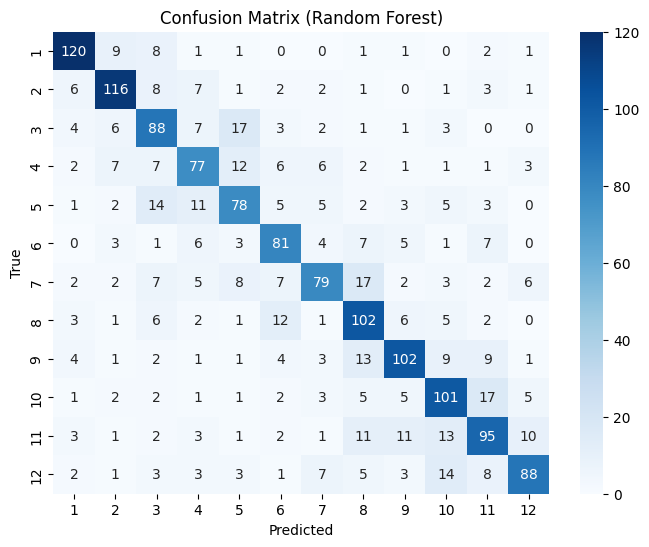


Cross-validation and Model Performance Summary:
           Model  CV Mean Accuracy  Test Set Accuracy
0  Random Forest         63.121936          67.769092


In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load PCA results
pca_data = pd.read_csv('cleaned_outlires_.csv')

# Separate features and labels
features = pca_data.drop(columns=['target'])  # Adjust column name if needed
labels = pca_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=500, random_state=42)

# Cross-validation (5-fold) to evaluate model
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

# Train the Random Forest model on the full training data
rf.fit(X_train, y_train)

# Predict on test set
rf_predictions = rf.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy on Test Set: {rf_accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels.unique(), yticklabels=labels.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Summarize results in a table format
cv_summary = {
    'Model': ['Random Forest'],
    'CV Mean Accuracy': [cv_scores.mean() * 100],  # Mean CV score
    'Test Set Accuracy': [rf_accuracy * 100],      # Test set accuracy
}

cv_summary_df = pd.DataFrame(cv_summary)
print("\nCross-validation and Model Performance Summary:")
print(cv_summary_df)

